
# Keypoint Selection

1. Images should be color images containing human faces (no animals, cartoons etc.)
2. The face should fill most of the frame so that there isn't a lot of background, body etc.
3. Images should be of sufficiently large resolution (>200 pixels in width/height)
4. Both images need to be the same resolution. This is just to simplify our implementation of face morphing.  Please crop or resize as necessary to make them the same dimensions



In [41]:
%matplotlib notebook

import a5utils
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [42]:
image1 = plt.imread('Trump.png')
image2 = plt.imread('Biden.png')

#convert images to floating point
if (image1.dtype == np.uint8):
    image1 = image1.astype(float) / 256
    
if (image2.dtype == np.uint8):
    image2 = image2.astype(float) / 256


# images should be same size for morphing 
assert(image1.shape == image2.shape)

#number of points to click per-batch
npoints = 50

# initialize
batch = 0


<IPython.core.display.Javascript object>


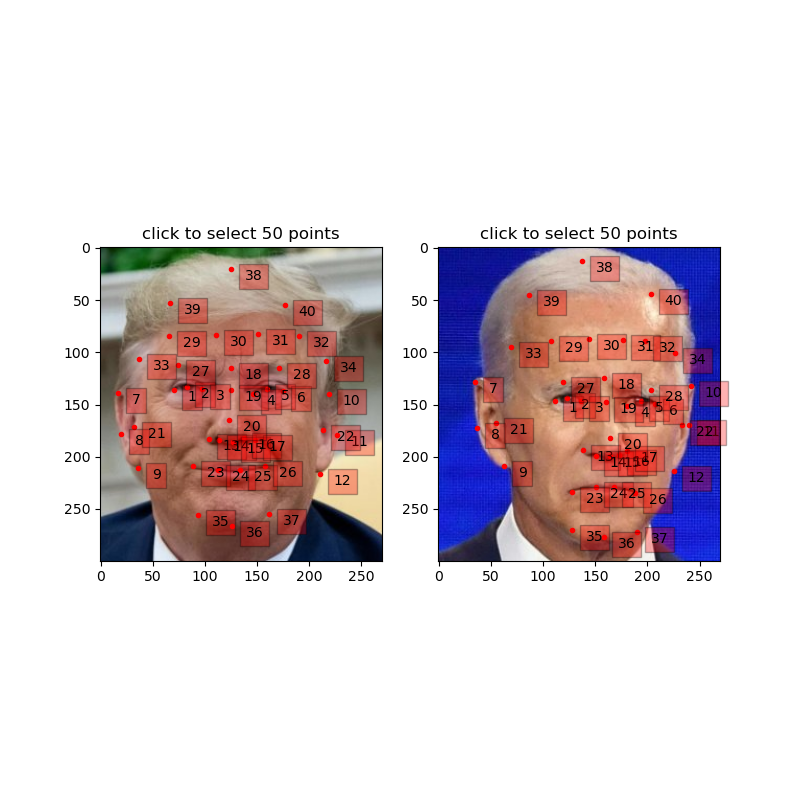

In [43]:
# re-execute this cell as many times as needed to 
# label a dense set of points.

#make the figure a bit bigger so it is easier to click
plt.rcParams['figure.figsize'] = [8, 8]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image1)
if (batch>0):
    ax1.plot(coords1[0,:],coords1[1,:],'r.')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image2)
if (batch>0):
    ax2.plot(coords2[0,:],coords2[1,:],'r.')

pts1 = a5utils.select_k_points(ax1,npoints)
pts2 = a5utils.select_k_points(ax2,npoints)



In [44]:
# execute this cell after each round of clicking in order
# to append the clicked points to the array
if (batch==0):
    coords1 = np.array((pts1.xs,pts1.ys))
    coords2 = np.array((pts2.xs,pts2.ys))
else:
    coords1 = np.append(coords1,np.array((pts1.xs,pts1.ys)),axis=1)
    coords2 = np.append(coords2,np.array((pts2.xs,pts2.ys)),axis=1)

batch = batch + 1

In [45]:
# save results
f = open('face_correspondeces.pckl','wb')
pickle.dump((image1,image2,coords1,coords2),f)
f.close()